In [1]:
import pandas as pd
from tqdm.auto import tqdm
import os
tqdm.pandas()

# Directory containing the files
directory = 'data/reviews'

# List to hold dataframes
dfs = []

# Iterate over all files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):  # Assuming the files are in CSV format
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path)
        df['game'] = filename[:-4]  # Add a column with the filename
        dfs.append(df)

# Concatenate all dataframes into one
df = pd.concat(dfs, ignore_index=True)
df['review'] = df['review'].astype(str)

# Display the combined dataframe
df

,language,review,game
0,english,"This is a really fun and cozy game, I'm enjoyi...",2294910
1,english,"Simplistic, grindy, no new content opens with ...",2294910
2,english,A casual and relaxing experience with nice aes...,2294910
3,english,Good relaxing game and beautiful ambiance.\nGa...,2294910
4,english,"good casual game! I recommand it, it's easy to...",2294910
...,...,...,...
96661,english,"oh my gosh, this penguin island is the cutest ...",2635350
96662,french,"Très bon point musique très cool,relaxante,com...",2635350
96663,german,"Ah, na endlich..\nWurde auch Zeit. das es Rele...",2635350
96664,spanish,"Es un juego de pingüinos, encima de construcci...",2635350


In [2]:
df.language.value_counts().sort_values(ascending=False)

language
english       61236
schinese       8268
german         5568
russian        5009
french         4233
spanish        1893
brazilian      1837
koreana        1446
polish         1301
japanese       1225
tchinese        726
turkish         601
dutch           542
italian         494
czech           454
swedish         349
latam           241
ukrainian       203
danish          200
norwegian       177
thai            161
hungarian       146
finnish         139
portuguese      124
romanian         42
greek            24
bulgarian        14
vietnamese       11
indonesian        2
Name: count, dtype: int64

In [ ]:
df.groupby('game').size().sort_values(ascending=True)

game
2211500       10
2594480       13
1737200       18
3059480       19
1346210       38
1837210       40
2294910       43
1612100       44
1575510       56
2634610       72
1446000       73
2576600       75
1653100       80
1956670      106
1919350      128
2878100      151
2289390      182
1582290      202
1450250      207
2300300      234
512460       247
2109270      308
916900       338
2635350      351
1028590      373
1647190      377
1837330      453
1133120      493
434000       675
1539580      850
914750      1210
1390190     1607
1875060     1637
431180      1642
1372320     2186
898890      2328
853550      2915
244710      3651
275100      4178
222730      5658
486310      5884
1593030     6467
926990      9433
382310     12906
1062090    28708
dtype: int64

count    96666.000000
mean       280.117239
std        563.734870
min          1.000000
25%         28.000000
50%         96.000000
75%        287.000000
max       8000.000000
Name: review, dtype: float64

<Axes: >

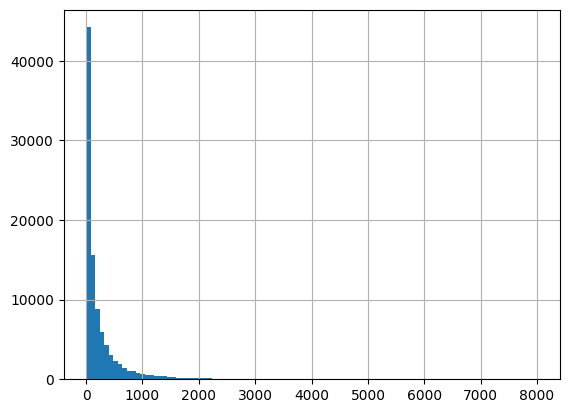

In [4]:
display(df['review'].str.len().describe())
df['review'].str.len().hist(bins=100)

In [7]:
df = pd.read_csv('data/reviews/1062090.csv')

# Split df into 4 smaller dataframes
dfs = []
n = 4
size = len(df) // n
for i in range(n):
    start = i * size
    end = (i + 1) * size
    if i == n - 1:
        end = len(df)
    dfs.append(df.iloc[start:end])

# Display the first dataframe
dfs[0].to_csv('data/reviews/1062090_0.csv')
dfs[1].to_csv('data/reviews/1062090_1.csv')
dfs[2].to_csv('data/reviews/1062090_2.csv')
dfs[3].to_csv('data/reviews/1062090_3.csv')